In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

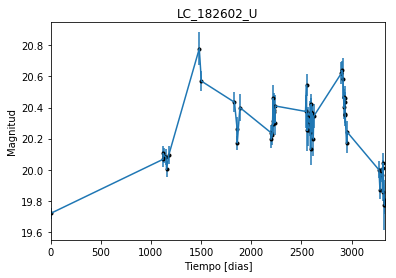

In [2]:
data = np.genfromtxt('LC_182602_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_182602_U')
plt.savefig("LC_182602_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

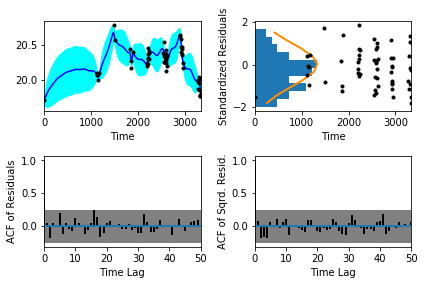

In [5]:
sample.assess_fit()

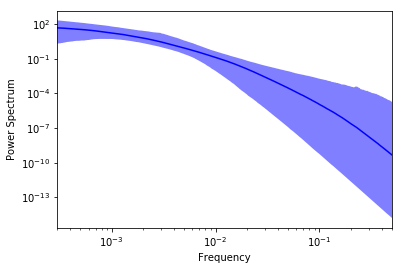

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

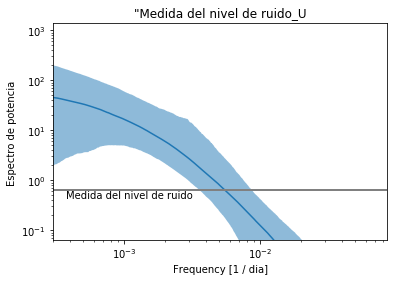

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_182602_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_182602_U')

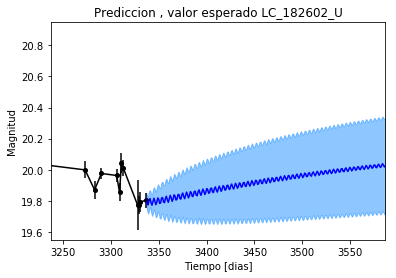

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_182602_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_182602_U')

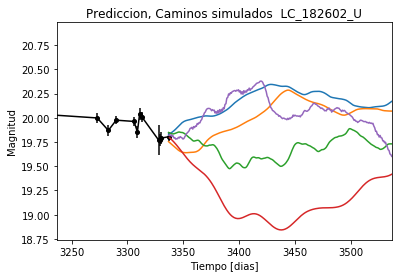

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_182602_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


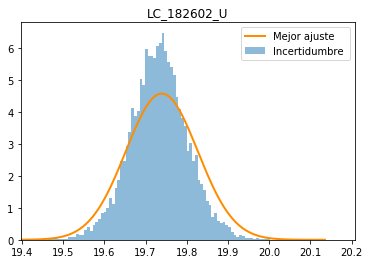

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_182602_U')
plt.savefig("Mejor_ajuste_LC_182602_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_182602_U')

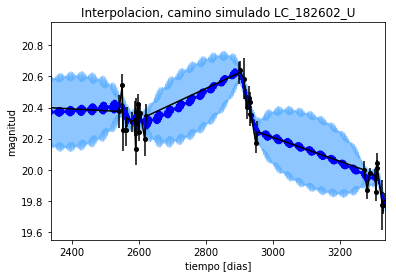

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_U')

Text(0.5,1,'Interpolacion, camino simulado LC_182602_U')

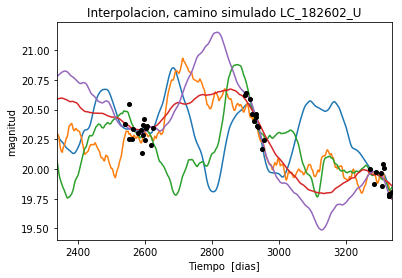

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 748.769697883
Median: 0.0209570304877
Standard deviation: 0.207044667351
68% credibility interval: [ 0.0017998   0.24227833]
95% credibility interval: [  4.32699824e-04   8.06076089e-01]
99% credibility interval: [  3.30235794e-04   9.68011027e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 851.336216872
Median: 0.00414153785231
Standard deviation: 0.0837417948659
68% credibility interval: [ 0.00059025  0.04454303]
95% credibility interval: [ 0.00033323  0.25702008]
99% credibility interval: [  3.05509031e-04   6.08575730e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 699.961117826
Median: 0.037052954762
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1069.51901837
Median: 74.3495281115
Standard deviation: 1.6696358582
68% credibility interval: [ 72.51005443  75.52715225]
95% credibility interval: [ 69.84311702  76.15041835]
99% credibility interval: [ 67.84094428  76.86438364]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 480.43923323
Median: 1.06512633716
Standard deviation: 2.27147804042
68% credibility interval: [ 0.11521344  4.41547967]
95% credibility interval: [ 0.02963525  7.84238064]
99% credibility interval: [  0.01440554  10.21720228]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 613.213891807
Median: 0.790583529892
Standard deviation: 8.59015950273
68% credibility interval: [ 0.03697156  8.4367867 ]
95% credibility interval: [  2.82531223e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 14226.5199996
Median: 1.54940222541e-29
Standard deviation: 2.55979122115e+68
68% credibility interval: [  1.28536882e-66   2.98199888e-04]
95% credibility interval: [  4.02957834e-126   4.13350775e+057]
99% credibility interval: [  4.02268333e-133   3.31645184e+063]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2514.41966498
Median: 20.1892172837
Standard deviation: 0.174036530425
68% credibility interval: [ 20.0177405   20.32162741]
95% credibility interval: [ 19.79581473  20.48327827]
99% credibility interval: [ 19.61423523  20.64661116]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 512.179745504
Median: 0.00791904163809
Standard deviation: 0.231915285317
68% credibility interval: [ 0.          0.31912057]
95% credibility interval: [ 0.         0.8528787]
99% credibility interval: [ 0.          0.97458203]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 512.179745504
Median: 0.00791904163809
Standard deviation: 0.231915285317
68% credibility interval: [ 0.          0.31912057]
95% credibility interval: [ 0.         0.8528787]
99% credibility interval: [ 0.          0.97458203]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 757.954728333
Median: 0.0
Standard deviation: 0.000690919590445
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1069.51901837
Median: 74.3495281115
Standard deviation: 1.6696358582
68% credibility interval: [ 72.51005443  75.52715225]
95% credibility interval: [ 69.84311702  76.15041835]
99% credibility interval: [ 67.84094428  76.86438364]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1621.65145019
Median: 0.119432336316
Standard deviation: 0.121535904394
68% credibility interval: [ 0.07187322  0.21032596]
95% credibility interval: [ 0.0469279   0.41048289]
99% credibility interval: [ 0.03602751  0.72609466]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2131.04894643
Median: 1.02758500853
Standard deviation: 0.168793139619
68% credibility interval: [ 0.88100836  1.21110756]
95% credibility interval: [ 0.75968912  1.42534905]
99% credibility interval: [ 0.6932293   1.57280351]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1006.86194907
Median: 0.0012371602294
Standard deviation: 0.243944516252
68% credibility interval: [  9.95435962e-06   3.08200854e-02]
95% credibility interval: [  3.67634045e-61   4.64119961e-01]
99% credibility interval: [  4.51232262e-67   1.48742862e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 748.769697883
Median: (-0.131676906042+0j)
Standard deviation: 1.95337545569
68% credibility interval: [-1.52227962-0.26094236j -0.01130849-2.52321246j]
95% credibility interval: [ -5.06472544e+00+0.j          -2.71873318e-03-1.47246399j]
99% credibility interval: [ -6.08219266e+00+0.j          -2.07493269e-03-0.00329497j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 851.336216872
Median: (-0.0260220497828+0.98079973316j)
Standard deviation: 1.54925293728
68% credibility interval: [-0.27987214+4.93448553j -0.00370866+0.j        ]
95% credibility interval: [-1.61490482+5.738877j   -0.00209374+2.16631169j]
99% credibility interval: [ -3.82379408e+00+4.35248858j  -1.91956985e-03+0.01604776j]
Posterior summary for param